In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_df = pd.read_json("train.jsonl", lines=True)
val_df = pd.read_json("val.jsonl", lines=True)
test_df = pd.read_json("test.jsonl", lines=True)

In [8]:
print("Số lượng mẫu:")
print("Train:", len(train_df))
print("Val:", len(val_df))
print("Test:", len(test_df))

Số lượng mẫu:
Train: 158
Val: 20
Test: 20


In [9]:
print("\nPreview train:")
print(train_df.head())


Preview train:
                                     id  \
0  0fa12b46-1bab-4631-859c-a385199befd8   
1  aab6502c-ee2c-49b3-b0ac-5615600dc256   
2  6c702550-a4a3-43ea-bf3b-448e246fd7cc   
3  5be31e0f-a999-44f4-8a68-925c1a0fe3d1   
4  1e501ac7-cab1-490a-b2d4-afbe55d4cf06   

                                            messages      label  
0  [{'role': 'system', 'content': 'Thành phố trải...  intrinsic  
1  [{'role': 'system', 'content': 'Von Neumann bị...         no  
2  [{'role': 'system', 'content': 'Hải ly, tên kh...         no  
3  [{'role': 'system', 'content': 'Ngôn ngữ của l...         no  
4  [{'role': 'system', 'content': 'Việc Mác phát ...         no  


In [10]:
print("\nCác cột trong train:", train_df.columns)


Các cột trong train: Index(['id', 'messages', 'label'], dtype='object')


In [11]:
for col in ["context", "prompt", "response"]:
    if col in train_df.columns:
        train_df[col + "_len"] = train_df[col].apply(lambda x: len(str(x).split()))

In [12]:
if "response_len" in train_df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(train_df["response_len"], bins=30, kde=True)
    plt.title("Phân phối độ dài response")
    plt.xlabel("Số từ")
    plt.ylabel("Số mẫu")
    plt.show()

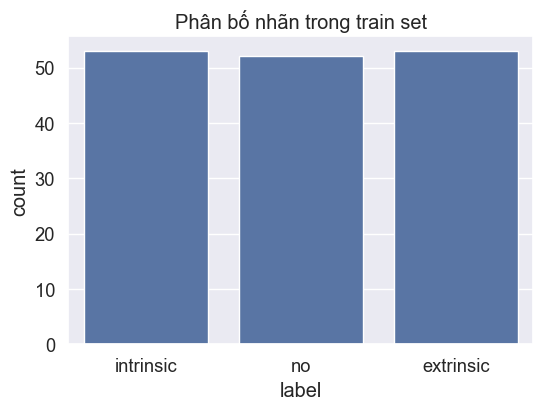

In [13]:
if "label" in train_df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="label", data=train_df)
    plt.title("Phân bố nhãn trong train set")
    plt.show()

### Kiểm tra tỷ lệ train/val/test

In [14]:
total = len(train_df) + len(val_df) + len(test_df)
print("\nTỷ lệ chia:")
print("Train: {:.2f}%".format(len(train_df)/total*100))
print("Val: {:.2f}%".format(len(val_df)/total*100))
print("Test: {:.2f}%".format(len(test_df)/total*100))


Tỷ lệ chia:
Train: 79.80%
Val: 10.10%
Test: 10.10%
